In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version은 코랩 명령입니다.
    %tensorflow_version 2.x
except Exception:
    pass

# 이 노트북은 텐서플로 ≥2.4이 필요합니다
# 2.x 버전은 대부분 동일한 결과를 만들지만 몇 가지 버그가 있습니다.
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.4"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
tf.random.set_seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
tf.constant([[1., 2., 3.], [4., 5., 6.]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
t = tf.constant([[1., 2., 3.], [4., 5., 6]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[:1]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>

In [8]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

In [13]:
a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [14]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [15]:
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [16]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [17]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [18]:
try:
  tf.constant(2.) + tf.constant(2)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [19]:
try:
  tf.constant(2.0) + tf.constant(40., dtype=tf.float64)
except tf.errors.InvalidArgumentError as ex:
  print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2]


In [20]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [21]:
tf.constant([1, 1.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 1.], dtype=float32)>

In [22]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [23]:
v.assign(2 * v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [24]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[:, 2].assign([0, 1])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [26]:
try:
  v[1] = [7., 8., 9.]
except TypeError as ex:
  print(ex)

'ResourceVariable' object does not support item assignment


In [27]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [28]:
sparse_delta = tf.IndexedSlices(values=[[1., 2., 3.], [4., 5., 6.]],
                                indices=[1, 0])
v.scatter_update(sparse_delta)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[4., 5., 6.],
       [1., 2., 3.]], dtype=float32)>

In [29]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [30]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [31]:
tf.constant("hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [32]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [33]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [34]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [35]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [36]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡", "커피"])

In [37]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 6, 5, 2, 2], dtype=int32)>

In [38]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [52964, 54588]]>

In [39]:
l = tf.strings.unicode_decode(p, "UTF-8")
l

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [52964, 54588]]>

In [40]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [41]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [42]:
r2 = tf.ragged.constant([[65, 66], [], [42]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [52964, 54588], [65, 66], [],
 [42]]>

In [43]:
r3 = tf.ragged.constant([[68, 69, 70], [71],[], [72, 73], [77]])
tf.concat([r, r3], axis=1)

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73], [52964, 54588, 77]]>

In [44]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI', b'M'], dtype=object)>

In [45]:
r.to_tensor()

<tf.Tensor: shape=(5, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0],
       [52964, 54588,     0,     0,     0,     0]], dtype=int32)>

In [46]:
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])
s

In [47]:
print(s)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [48]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [49]:
s2 = s * 2.0
print(s2)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [50]:
try:
  s3 = s + 1
except TypeError as ex:
  print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'int'


In [51]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [52]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [53]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [54]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [55]:
print(s6)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [0 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([2. 1.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [56]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [57]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [58]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

In [59]:
array = tf.TensorArray(dtype=tf.float32, size=3)

In [60]:
try:
  array = array.write(0, tf.constant([1, 2]))
except tf.errors.InvalidArgumentError as ex:
  print(ex)

TensorArray dtype is float32 but Op is trying to write dtype int32 


In [61]:
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [62]:
array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [63]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [64]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
print(mean, variance, sep="\n\r")

tf.Tensor([2. 3.], shape=(2,), dtype=float32)
tf.Tensor([4.6666665 8.666667 ], shape=(2,), dtype=float32)


In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [66]:
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) / 2
  linear_loss = tf.abs(error) - 0.5
  return tf.where(is_small_error, squared_loss, linear_loss)

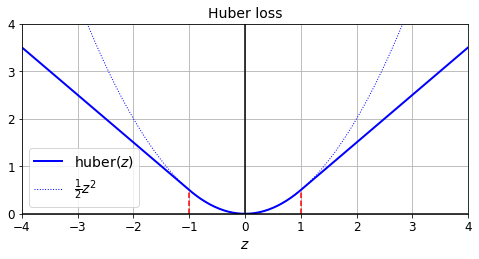

In [67]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [68]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu",
                       kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [69]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 4s 6ms/step - loss: 0.6235 - mae: 0.9953 - val_loss: 0.2862 - val_mae: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.2197 - mae: 0.5177 - val_loss: 0.2382 - val_mae: 0.5281


In [70]:
model.save("my_model_with_a_custom_loss.h5")

In [71]:
model = keras.models.load_model("my_model_with_a_custom_loss.h5",
                                custom_objects={"huber_fn": huber_fn})

In [72]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 5ms/step - loss: 0.2054 - mae: 0.4982 - val_loss: 0.2209 - val_mae: 0.5050
Epoch 2/2
363/363 [==============================] - 1s 4ms/step - loss: 0.1999 - mae: 0.4900 - val_loss: 0.2127 - val_mae: 0.4986


In [73]:
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) / 2
    linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

In [74]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 7ms/step - loss: 0.2226 - mae: 0.4892 - val_loss: 0.2540 - val_mae: 0.4907
Epoch 2/2
363/363 [==============================] - 3s 8ms/step - loss: 0.2184 - mae: 0.4844 - val_loss: 0.2372 - val_mae: 0.4879


In [75]:
model.save("my_model_with_a_custom_loss_threshold_2.h5")

In [76]:
model = keras.models.load_model("my_model_with_a_custom_loss_threshold_2.h5",
                                custom_objects={"huber_fn": create_huber(2.0)})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 3s 7ms/step - loss: 0.2147 - mae: 0.4800 - val_loss: 0.2133 - val_mae: 0.4654
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.2119 - mae: 0.4762 - val_loss: 0.1992 - val_mae: 0.4643


In [77]:
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs):
    self.threshold = threshold
    super().__init__(**kwargs)
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
    return tf.where(is_small_error, squared_loss, linear_loss)
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "threshold": self.threshold}

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu",
                       kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [79]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 8ms/step - loss: 0.7095 - mae: 0.8863 - val_loss: 0.3378 - val_mae: 0.5485
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2416 - mae: 0.5083 - val_loss: 0.2660 - val_mae: 0.5089


In [80]:
model.save("my_model_with_a_custom_loss_class.h5")

In [81]:
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5",
                                custom_objects={"HuberLoss": HuberLoss})

In [82]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 4ms/step - loss: 0.2286 - mae: 0.4970 - val_loss: 0.2120 - val_mae: 0.4723
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2216 - mae: 0.4904 - val_loss: 0.2045 - val_mae: 0.4725


In [83]:
model.loss.threshold

2.0

In [84]:
def my_softplus(z):
  return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
  stddev = tf.sqrt(2. / (shape[0] + shape[1]))
  return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
  return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights):
  return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [85]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu",
                       kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [87]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 1.3809 - mae: 0.8429 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.6669 - mae: 0.5528 - val_loss: 2.7498 - val_mae: 0.5489


In [88]:
model.save("my_model_with_many_custom_parts.h5")

In [89]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "my_l1_regularizer": my_l1_regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus
    }
)

In [90]:
class MyL1Regularizer(keras.regularizers.Regularizer):
  def __init__(self, factor):
    self.factor = factor
  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.factor * weights))
  def get_config(self):
    return {"factor": self.factor}

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [92]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 1.7210 - mae: 0.9218 - val_loss: inf - val_mae: inf
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6100 - mae: 0.5358 - val_loss: inf - val_mae: inf


In [93]:
model.save("my_model_with_many_custom_parts.h5")

In [94]:
model = keras.models.load_model(
    "my_model_with_many_custom_parts.h5",
    custom_objects={
        "MyL1Regularizer": MyL1Regularizer,
        "my_positive_weights": my_positive_weights,
        "my_glorot_initializer": my_glorot_initializer,
        "my_softplus": my_softplus,
    }
)

In [95]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),                  
])

model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 1.9566 - huber_fn: 0.8519
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.5135 - huber_fn: 0.2509


In [96]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

sample_weight = np.random.rand(len(y_train))

history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.1169 - huber_fn: 0.2370
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1129 - huber_fn: 0.2282


In [97]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.11689365655183792, 0.11763515311575841)

In [98]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [99]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [100]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [101]:
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [102]:
precision.reset_states()

In [103]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # 기본 매개변수 처리 (예를 들면, dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [104]:
m = HuberMetric(2.)

m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [105]:
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))
m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [106]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=21.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=3.0>]

In [107]:
m.reset_states()

In [108]:
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu",
                       kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[HuberMetric(2.0)])

model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.9459 - huber_metric_1: 0.9459
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 0.2585 - huber_metric_1: 0.2585


In [110]:
model.save("my_model_with_a_custom_metric.h5")

In [111]:
model = keras.models.load_model("my_model_with_a_custom_metric.h5",
                                custom_objects={
                                    "huber_fn": create_huber(2.0),
                                    "HuberMetric": HuberMetric
                                })

In [112]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2281 - huber_metric_1: 0.2281
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2202 - huber_metric_1: 0.2202


In [113]:
model.metrics[-1].threshold

2.0

In [114]:
class HuberMetric(keras.metrics.Mean):
  def __init__(self, threshold=1.0, name="HuberMetric", dtype=None):
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    super().__init__(name=name, dtype=dtype)
  def update_state(self, y_true, y_pred, sample_weight=None):
    metric = self.huber_fn(y_true, y_pred)
    super(HuberMetric, self).update_state(metric, sample_weight)
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "threshold": self.threshold}

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [116]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[HuberMetric(2.0)])

In [117]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.4838 - HuberMetric: 0.9554
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1225 - HuberMetric: 0.2418


In [118]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.48375341296195984, 0.48375356721648444)

In [119]:
model.save("my_model_with_a_custom_metric_v2.h5")

In [120]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.h5",
                                custom_objects={"HuberMetric": HuberMetric})

In [121]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.2372 - HuberMetric: 0.2372
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2283 - HuberMetric: 0.2283


In [122]:
model.metrics[-1].threshold

2.0

In [123]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [124]:
exponential_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [125]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer,
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7795 - val_loss: 0.4374
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4272 - val_loss: 0.3776
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4115 - val_loss: 0.3630
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4057 - val_loss: 0.3733
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.3757


0.37573695182800293

In [126]:
class MyDense(keras.layers.Layer):
  def __init__(self, units, activation=None, **kwargs):
    super().__init__(**kwargs)
    self.units = units
    self.activation = keras.activations.get(activation)

  def build(self, batch_input_shape):
    self.kernel = self.add_weight(
        name="kernel", shape=[batch_input_shape[-1], self.units],
        initializer="glorot_normal"
    )
    self.bias = self.add_weight(
        name="bias", shape=[self.units], initializer="zeros"
    )
    super().build(batch_input_shape)

  def call(self, X):
    return self.activation(X @ self.kernel + self.bias)

  def compute_output_shape(self, batch_input_shape):
    return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.units])

  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "units": self.units,
            "activation": keras.activations.serialize(self.activation)}

In [127]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1),
])

In [128]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.6812 - val_loss: 2.1810
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.4855


0.48547855019569397

In [129]:
model.save("my_model_with_a_custom_layer.h5")

In [130]:
model = keras.models.load_model("my_model_with_a_custom_layer.h5",
                                custom_objects={"MyDense": MyDense})

In [131]:
class MyMultiLayer(keras.layers.Layer):
  def call(self, X):
    X1, X2 = X
    print("X1.shape: ", X1.shape, " X2.shape: ", X2.shape)
    return X1 + X2, X1 * X2

  def compute_output_shape(self, batch_input_shape):
    batch_input_shape1, batch_input_shape2 = batch_input_shape
    return [batch_input_shape1, batch_input_shape2]

In [132]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


In [133]:
def split_data(data):
  columns_count = data.shape[-1]
  half = columns_count // 2
  return data[:,:half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

In [134]:
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


In [135]:
input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation="selu")(hidden_A)
hidden_B = keras.layers.Dense(30, activation="selu")(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

X1.shape:  (None, 4)  X2.shape:  (None, 4)


In [136]:
model.compile(loss="mse", optimizer="nadam")

model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 2s 3ms/step - loss: 2.0702 - val_loss: 1.8402
Epoch 2/2
363/363 [==============================] - 1s 3ms/step - loss: 1.0144 - val_loss: 2.6245


In [140]:
class AddGaussianNoise(keras.layers.Layer):
  def __init__(self, stddev, **kwargs):
    super().__init__(**kwargs)
    self.stddev = stddev

  def call(self, X, training=None):
    if training:
      noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
      return X + noise
    else:
      return X
  
  def compute_output_shape(self, batch_input_shape):
    return batch_input_shape

In [141]:
model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1),
])

model.compile(loss="mse", optimizer="nadam")

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 2.2774 - val_loss: 5.4686
Epoch 2/2
162/162 [==============================] - 0s 2ms/step - loss: 0.7480


0.7480380535125732

In [142]:
X_new_scaled = X_test_scaled

In [166]:
class ResidualBlock(keras.layers.Layer):
  def __init__(self, n_layers, n_neurons, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                      kernel_initializer="he_normal")
                  for _ in range(n_layers)]
  
  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    return inputs + Z


In [167]:
class ResidualRegressor(keras.models.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(30, activation="elu",
                                      kernel_initializer="he_normal")
    self.block1 = ResidualBlock(2, 30)
    self.block2 = ResidualBlock(2, 30)
    self.out = keras.layers.Dense(output_dim)

  def call(self, inputs):
    Z = self.hidden1(inputs)
    for _ in range(1 + 3):
      Z = self.block1(Z)
    Z = self.block2(Z)
    return self.out(Z)


In [168]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [169]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 3s 3ms/step - loss: 9.1325
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 1.0578
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.8868
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5833
Epoch 5/5
162/162 [==============================] - 1s 2ms/step - loss: 0.6505


In [170]:
model.save("my_custom_model.ckpt")

In [171]:
model = keras.models.load_model("my_custom_model.ckpt")

history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 [==============================] - 3s 3ms/step - loss: 0.8020
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5451
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4602
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5316
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4782


In [172]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 [==============================] - 4s 4ms/step - loss: 1.1123
Epoch 2/5
363/363 [==============================] - 2s 6ms/step - loss: 0.4418
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4257
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.3731
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.5830


In [173]:
class ReconstructingRegressor(keras.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(30, activation="selu",
                                      kernel_initializer="lecun_normal")
    for _ in range(5)]
    self.out = keras.layers.Dense(output_dim)
    self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

  def build(self, batch_input_shape):
    n_inputs = batch_input_shape[-1]
    self.reconstruct = keras.layers.Dense(n_inputs)

  def call(self, inputs, training=None):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    reconstruction = self.reconstruct(Z)
    self.recon_loss = 0.05 * tf.reduce_mean(tf.square(reconstruction - inputs))

    if training:
      result = self.reconstruction_mean(recon_loss)
      self.add_metrics(result)
    return self.out(Z)

  def train_step(self, data):
    x, y = data

    with tf.GradientTape() as tape:
      y_pred = self(x)
      loss = self.compiled_loss(y, y_pred, regularization_losses=[self.recon_loss])

    gradients = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

    return {m.name: m.result() for m in self.metrics}

In [174]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
y_pred = model.predict(X_test_scaled)

Epoch 1/2
363/363 [==============================] - 5s 3ms/step - loss: 0.7719 - reconstruction_error: 0.0000e+00
Epoch 2/2
363/363 [==============================] - 2s 6ms/step - loss: 0.4268 - reconstruction_error: 0.0000e+00


In [175]:
def f(w1, w2):
  return 3 * w1 ** 2 + 2 * w1 * w2

In [176]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [177]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [178]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
  z = f(w1, w2)
gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [179]:
with tf.GradientTape() as tape:
  z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
  dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
  print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [180]:
with tf.GradientTape(persistent=True) as tape:
  z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape

In [181]:
dz_dw1, dz_dw2

(<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>)

In [182]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
  z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [183]:
with tf.GradientTape() as tape:
  tape.watch(c1)
  tape.watch(c2)
  z = f(c1, c2)
gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [184]:
with tf.GradientTape() as tape:
  z1 = f(w1, w2 + 2.)
  z2 = f(w1, w2 + 5.)
  z3 = f(w1, w2 + 7.)
tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [187]:
with tf.GradientTape(persistent=True) as tape:
  z1 = f(w1, w2 + 2.)
  z2 = f(w1, w2 + 5.)
  z3 = f(w1, w2 + 7.)

reduce_sum = tf.reduce_sum(tf.stack([tape.gradient(z, [w1, w2]) for z in (z1, z2, z3)]), axis=0)
del tape

reduce_sum

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([136.,  30.], dtype=float32)>

In [188]:
with tf.GradientTape(persistent=True) as hessian_tape:
  with tf.GradientTape() as jacobian_tape:
    z = f(w1, w2)
  jacobians = jacobian_tape.gradient(z, [w1, w2])
hessians = [hessian_tape.gradient(jacobian, [w1, w2])
            for jacobian in jacobians]
del hessian_tape
jacobians

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [189]:
hessians

[[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
  <tf.Tensor: shape=(), dtype=float32, numpy=2.0>],
 [<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None]]

In [190]:
def f(w1, w2):
  return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
  z = f(w1, w2)

tape.gradient(z, [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [191]:
x = tf.Variable(100.)
with tf.GradientTape() as tape:
  z = my_softplus(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=nan>]

In [192]:
tf.math.log(tf.exp(tf.constant(30., dtype=tf.float32)) + 1.)

<tf.Tensor: shape=(), dtype=float32, numpy=30.0>

In [193]:
x = tf.Variable([100.])
with tf.GradientTape() as tape:
  z = my_softplus(x)
tape.gradient(z, [x])

[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>]

In [194]:
@tf.custom_gradient
def my_better_softplus(z):
  exp = tf.exp(z)
  def my_softplus_gradients(grad):
    return grad / (1 + 1 / exp)
  return tf.math.log(exp + 1), my_softplus_gradients

In [195]:
def my_better_softplus(z):
  return tf.where(z > 30., z, tf.math.log(tf.exp(z) + 1.))

In [196]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
  z = my_better_softplus(x)
z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([nan], dtype=float32)>])